In [1]:
# import networkx as nx
# import matplotlib.pyplot as plt
from my_functions import *

['X', 'Y', 'Z', 'W', 'not1', 'not2', 'and1', 'or1', 'and2']
Levels: {'X': 0, 'Y': 0, 'Z': 0, 'W': 0, 'not1': 1, 'not2': 1, 'and1': 2, 'or1': 3, 'and2': 3}
Nodes in order: ['X', 'Y', 'Z', 'W', 'not1', 'not2', 'and1', 'or1', 'and2']
Input Nodes: ['X', 'Y', 'Z', 'W']
Output Nodes:  ['or1', 'and2']
Input Vector: 0000

Updated Node X value to 0
Updated Node Y value to 0
Updated Node Z value to 0
Updated Node W value to 0
Updated Node not1 value to 1
Updated Node not2 value to 1
Updated Node and1 value to 0
Updated Node or1 value to 1
Output or1 : 1
Output Vector: 1 

Updated Node and2 value to 0
Output and2 : 0
Output Vector: 10 

Input Vector: 0001

Updated Node X value to 0
Updated Node Y value to 0
Updated Node Z value to 0
Updated Node W value to 1
Updated Node not1 value to 1
Updated Node not2 value to 0
Updated Node and1 value to 0
Updated Node or1 value to 0
Output or1 : 0
Output Vector: 0 

Updated Node and2 value to 0
Output and2 : 0
Output Vector: 00 

Input Vector: 0010

Updated 

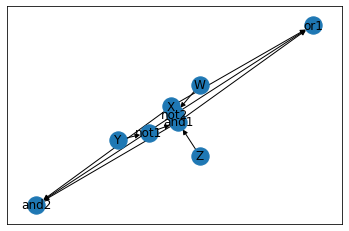

In [5]:
simulate("netlist.txt", "inputs.txt", "outputs.txt",
         show_circuit =True, print_details =True)

In [2]:
def gate_output(inputs, gate_type):
    if gate_type == "NOT": #inverter
        return int(not inputs[0])
    elif gate_type == "AND": #all inputs should be 1
        return int(not(0 in inputs))
    elif gate_type == "OR": #at least one 1
        return int(1 in inputs)
    elif gate_type == "NAND": #at least one 0
        return int(0 in inputs)  
    elif gate_type == "NOR": #all inputs should be 0 
        return int(not(1 in inputs) )
    elif gate_type == "XOR": #odd number of 1s
        return int((sum(inputs)%2)==1)
    else:
        return inputs
    
def execute_with_inputs(ckt, input_vector,output_file_path = False, print_details = False):
    i = 0
    output_vector = ""
    level_data = dict([(node, ckt.nodes[node]['level']) for node in list(ckt.nodes)])
    ordered = sorted(level_data, key=level_data.get)  
    for node in ordered:
        if list(ckt.predecessors(node)) == []:
            ckt.nodes[node['value'] = int(input_vector[i])
            i = i + 1
            input_vector
            if print_details:
                print('Updated Node', node, "value to", ckt.nodes[node]['value']) 
        else:
            node_inputs = [ckt.nodes[inp]['value'] for inp in list(ckt.predecessors(node))]
            ckt.nodes[node]['value'] = gate_output(node_inputs, ckt.nodes[node]['gate'])
            if print_details:
                print('Updated Node', node, "value to", ckt.nodes[node]['value'])
        if list(ckt.successors(node)) == []:
            output = ckt.nodes[node]['value']
            output_vector = output_vector + str(output)
            if print_details:
                print("Output", node, ":", output)
                print("Output Vector:", output_vector, "\n")
    return output_vector

def simulate(netlist_file_path, input_file_path, output_file_path =False, 
             show_circuit = False, print_details = False):
    circuit = constructDAG(netlist_file_path)
    assign_levels(circuit)
    if show_circuit:
        details(circuit)
    apply_input(circuit, input_file_path, output_file_path, print_details)

def constructDAG(netlist):
    graph = nx.DiGraph()
    f = open(netlist, "r")
    for x in f:
        gatelist = x.split() 
#         print(x.split())
        gate = gatelist[0].split(":")[0]
        name = gatelist[0].split(":")[1]
        graph.add_node(name, gate = gate, value = 'X', level = "_")
        if gate != "IN":
            inp = gatelist[1:]
            for input_var in inp:
                graph.add_edges_from([(input_var, name)])
    return graph

def assign_levels(graph):
    for node in list(graph.nodes):
        if graph.nodes[node]["gate"] == "IN":
            graph.nodes[node]["level"] = 0
        else:
            lev = max([graph.nodes[x]["level"] for x in list(graph.predecessors(node))]) + 1
            graph.nodes[node]["level"] = lev
#     level_data = dict([(node, graph.nodes[node]['level']) for node in list(graph.nodes)])
#     print("Levels:", level_data)
#     ordered = sorted(level_data, key=level_data.get)
#     print("Nodes in order:", ordered)

def details(graph):
    print(list(graph.nodes))
    level_data = dict([(node, graph.nodes[node]['level']) for node in list(graph.nodes)])
    print("Levels:", level_data)
    ordered = sorted(level_data, key=level_data.get)
    print("Nodes in order:", ordered)
    input_nodes = [item[0] for item in level_data.items() if item[1] == 0]
    output_nodes = [item[0] for item in level_data.items() if item[1] == max(level_data.values())]
    print("Input Nodes:", input_nodes)
    print("Output Nodes: ", output_nodes)
    plt.figure()
    nx.draw_networkx(graph, arrows=True)
    
def apply_input(graph, input_file_path, output_file_path = False, print_details = False):
    ipfile = open(input_file_path, "r")
    op_vec_list = []
    for vector in ipfile:
        if print_details:
            print("Input Vector:", vector)
        output_vector = execute_with_inputs(graph, vector, output_file_path, print_details=print_details)
        op_vec_list.append(output_vector + "\n")
        if output_file_path != False:
            outputFile = open(output_file_path, 'w')
            outputFile.writelines(op_vec_list)

In [5]:
list(graph.predecessors('not1'))

['Y']

In [6]:
max([0,1,2,3])

3

Levels: {'X': 0, 'Y': 0, 'Z': 0, 'not1': 1, 'and1': 2, 'or1': 3, 'and2': 3}
Nodes in order: ['X', 'Y', 'Z', 'not1', 'and1', 'or1', 'and2']
Level wise Nodes: ['X', 'Y', 'Z', 'not1', 'and1', 'or1', 'and2']
Input Nodes: ['X', 'Y', 'Z']
Output Nodes:  ['or1', 'and2']


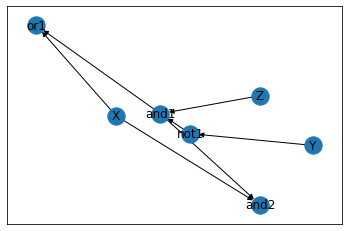

In [79]:
ckt = nx.DiGraph()
# ckt.add_node('X', gate = "IN", in_list = [], out_list = ['or1'], level = 0, value = 0)
# ckt.add_node('Y', gate = "IN", in_list = [], out_list = ['not1'], level = 0, value = 1)
# ckt.add_node('Z', gate = "IN", in_list = [], out_list = ['and1'], level = 0, value = 0)
# ckt.add_node('not1', gate = "NOT", in_list = ['Y'], out_list = ['and1'], level = 1, value = 'X')
# ckt.add_node('and1', gate = "AND", in_list = ["not1", "Z"], out_list = ['or1'], level = 2, value = 'X')
# ckt.add_node('or1', gate = "OR", in_list = ["and1" , "X"], out_list = [], level = 3, value = 'X')
# ckt.add_edges_from([('Y', 'not1') , ('not1', 'and1'), ('Z', 'and1'), ('and1', 'or1'), ('X', 'or1')])

#Define your circuit here
ckt.add_node('X', gate = "IN", level = 0, value = 'X')
ckt.add_node('Y', gate = "IN", level = 0, value = 'X')
ckt.add_node('Z', gate = "IN",level = 0, value = 'X')
ckt.add_node('not1', gate = "NOT", level = 1, value = 'X')
ckt.add_node('and1', gate = "AND", level = 2, value = 'X')
ckt.add_node('or1', gate = "OR", level = 3, value = 'X')
ckt.add_node('and2', gate = "AND",level = 3, value = 'X')
ckt.add_edges_from([('Y', 'not1') , ('not1', 'and1'), ('Z', 'and1'),('and1', 'or1'), ('X', 'or1'), ('X', 'and2'), ('and1', 'and2')])

def expected(inputs):  #user defined function for expected output
    or1 = int(inputs[0] or ((not inputs[1]) and inputs[2]))
    W = int(inputs[0] and ((not inputs[1]) and inputs[2]))
    return [or1, W] 

plt.figure()
nx.draw_networkx(ckt, arrows=True)

level_data = dict([(node, ckt.nodes[node]['level']) for node in list(ckt.nodes)])
print("Levels:", level_data)
ordered = sorted(level_data, key=level_data.get)
print("Nodes in order:", ordered)
input_nodes = [item[0] for item in level_data.items() if item[1] == 0]
output_nodes = [item[0] for item in level_data.items() if item[1] == max(level_data.values())]

print("Level wise Nodes:", ordered)
print("Input Nodes:", input_nodes)
print("Output Nodes: ", output_nodes)

In [38]:
def execute_interactive(ckt, node, print_details = False):
    if list(ckt.predecessors(node)) == []:
        ckt.nodes[node]['value'] = int(input("\nEnter the value of {}:".format(node)))
        if print_details:
            print('\nUpdated Node', node, "value to", ckt.nodes[node]['value']) 
    else:
        node_inputs = [ckt.nodes[inp]['value'] for inp in list(ckt.predecessors(node))]
        ckt.nodes[node]['value'] = gate_output(node_inputs, ckt.nodes[node]['gate'])
        if print_details:
            print('\nUpdated Node', node, "value to", ckt.nodes[node]['value'])
    if list(ckt.successors(node)) == []:
        output = ckt.nodes[node]['value']
        print("\nOutput", node, ":", output)

for node_name in ordered:
    execute_interactive(ckt, node_name, print_details= False)


Enter the value of X:1

Enter the value of Y:1

Enter the value of Z:1

Output or1 : 1

Output and2 : 0


In [5]:
def execute_all(ckt):
    correct = True
    level_data = dict([(node, ckt.nodes[node]['level']) for node in list(ckt.nodes)])
    input_nodes = [item[0] for item in level_data.items() if item[1] == 0]
    non_input_nodes = [node for node in list(ckt.nodes) if not(node in input_nodes)]
    output_nodes = [item[0] for item in level_data.items() if item[1] == max(level_data.values())]
    print("Input Nodes:", input_nodes)
    print("Output Nodes:", output_nodes)
    for num in range(2**len(input_nodes)):
        inputs = []
        outputs = []
        seq = bin(num).replace("0b", "")
        while (len(seq) != len(input_nodes)):
            seq = '0' + seq
        print("\n",seq)
        for i in range(0, len(input_nodes)):
            ckt.nodes[input_nodes[i]]['value'] = int(seq[i])
            inputs.append(ckt.nodes[input_nodes[i]]['value'])
        for node in non_input_nodes:
            node_inputs = [ckt.nodes[inp]['value'] for inp in list(ckt.predecessors(node))]
            ckt.nodes[node]['value'] = gate_output(node_inputs, ckt.nodes[node]['gate'])
            if list(ckt.successors(node)) == []:
                outputs.append(ckt.nodes[node]['value'])
        print("Output:",outputs)
        print("Expected Output:", expected(inputs))
        if outputs != expected(inputs):
            correct = False            
            print("Test case failed!")
    
    if correct:
        print("\nAll test cases passed!!")

execute_all(ckt)

Input Nodes: ['X', 'Y', 'Z']
Output Nodes: ['or1', 'W']

 000
Output: [0, 0]
Expected Output: [0, 0]

 001
Output: [1, 0]
Expected Output: [1, 0]

 010
Output: [0, 0]
Expected Output: [0, 0]

 011
Output: [0, 0]
Expected Output: [0, 0]

 100
Output: [1, 0]
Expected Output: [1, 0]

 101
Output: [1, 1]
Expected Output: [1, 1]

 110
Output: [1, 0]
Expected Output: [1, 0]

 111
Output: [1, 0]
Expected Output: [1, 0]

All test cases passed!!
